# Running Kmeans with Scaled Replace data - RF

Now we get to run our newly sampled data into a clustering alogrithm to get results

In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering

np.random.seed(42)

## Establishing the path

In [2]:
path = "../SHARED/"

## Recompletion data

In [3]:
# Reading data
data_pd = pd.read_excel(path + "RF_RCOMPL_RIG_SCALED_REPLACE.xlsx")

In [4]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1650 non-null   int64  
 1   #WELL_NAME                     1650 non-null   int64  
 2   CURRENT_STATUS                 1650 non-null   int64  
 3   JOB_CATEGORY                   1650 non-null   int64  
 4   JOB_START_DATE                 1650 non-null   int64  
 5   JOB_END_DATE                   1650 non-null   int64  
 6   JOB_STATUS                     1650 non-null   int64  
 7   LIKE_KIND                      1650 non-null   int64  
 8   PROJECT_TYPE                   1650 non-null   int64  
 9   PHASE_START_DATE               1650 non-null   int64  
 10  PHASE_END_DATE                 1650 non-null   int64  
 11  PHASE                          1650 non-null   int64  
 12  JOB_OP_CODE                    1650 non-null   i

In [5]:
# Here we want to go ahead and take all the numerical data as there are labels
# in this data
subset = data_pd.loc[:, data_pd.dtypes!=object]
subset

,Unnamed: 0,#WELL_NAME,CURRENT_STATUS,JOB_CATEGORY,JOB_START_DATE,JOB_END_DATE,JOB_STATUS,LIKE_KIND,PROJECT_TYPE,PHASE_START_DATE,...,PROPPANT_IN_FORMATION,STG_NUMBER,STG_TOP_DEPTH,STG_BOTTOM_DEPTH,STG_CLEAN_VOLUME_PUMPED,STG_SLURRY_VOLUME_PUMPED,BOTTOM_DEPTH_TVD,Rig_Duration (days),Stg_Duration (hrs),Stage_Length (meters)
0,0,6,0,0,0,7,0,3,0,4,...,367800,3,12579,16912,7303,7696,11958,5,1,4333
1,1,56,0,0,52,6,0,3,0,50,...,215900,24,13865,18039,3992,4229,13611,3,1,4174
2,2,41,0,0,36,25,1,1,0,38,...,325000,23,13864,13964,6710,7065,12334,9,2,100
3,3,38,0,0,60,18,0,2,0,61,...,353840,11,12793,17029,7804,8210,12755,124,1,4236
4,4,41,0,0,36,25,1,1,0,38,...,325000,23,13864,13964,6710,7065,12334,9,2,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,1645,46,0,0,55,17,1,2,0,54,...,375200,21,13417,17850,9418,9820,13083,5,2,4433
1646,1646,10,0,0,41,9,0,2,0,41,...,416820,12,12990,18302,7050,7494,12303,150,2,5312
1647,1647,34,0,0,30,15,0,3,0,31,...,297020,8,12708,17098,7033,7360,12262,6,1,4390
1648,1648,34,0,0,30,15,0,3,0,31,...,297420,23,12730,17098,7271,7585,12262,6,2,4368


In [6]:
# We want to scale the data
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(subset), columns=subset.columns)

In [7]:
scaled_df

,Unnamed: 0,#WELL_NAME,CURRENT_STATUS,JOB_CATEGORY,JOB_START_DATE,JOB_END_DATE,JOB_STATUS,LIKE_KIND,PROJECT_TYPE,PHASE_START_DATE,...,PROPPANT_IN_FORMATION,STG_NUMBER,STG_TOP_DEPTH,STG_BOTTOM_DEPTH,STG_CLEAN_VOLUME_PUMPED,STG_SLURRY_VOLUME_PUMPED,BOTTOM_DEPTH_TVD,Rig_Duration (days),Stg_Duration (hrs),Stage_Length (meters)
0,0.000000,0.090909,0.0,0.0,0.000000,0.28,0.0,1.000000,0.0,0.061538,...,0.255461,0.030769,0.175586,0.719910,0.166556,0.168998,0.325917,0.008368,0.001362,0.731527
1,0.000606,0.848485,0.0,0.0,0.787879,0.24,0.0,1.000000,0.0,0.769231,...,0.149957,0.353846,0.361585,0.868317,0.091044,0.092865,0.971116,0.000000,0.001362,0.706043
2,0.001213,0.621212,0.0,0.0,0.545455,1.00,1.0,0.333333,0.0,0.584615,...,0.225734,0.338462,0.361441,0.331709,0.153032,0.155142,0.472678,0.025105,0.002725,0.053053
3,0.001819,0.575758,0.0,0.0,0.909091,0.72,0.0,0.666667,0.0,0.938462,...,0.245765,0.153846,0.206537,0.735317,0.177983,0.180285,0.637002,0.506276,0.001362,0.715980
4,0.002426,0.621212,0.0,0.0,0.545455,1.00,1.0,0.333333,0.0,0.584615,...,0.225734,0.338462,0.361441,0.331709,0.153032,0.155142,0.472678,0.025105,0.002725,0.053053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,0.997574,0.696970,0.0,0.0,0.833333,0.68,1.0,0.666667,0.0,0.830769,...,0.260601,0.307692,0.296789,0.843429,0.214792,0.215639,0.765027,0.008368,0.002725,0.747556
1646,0.998181,0.151515,0.0,0.0,0.621212,0.36,0.0,0.666667,0.0,0.630769,...,0.289509,0.169231,0.235030,0.902950,0.160786,0.164562,0.460578,0.615063,0.002725,0.888444
1647,0.998787,0.515152,0.0,0.0,0.454545,0.60,0.0,1.000000,0.0,0.476923,...,0.206300,0.107692,0.194244,0.744403,0.160399,0.161620,0.444575,0.012552,0.001362,0.740664
1648,0.999394,0.515152,0.0,0.0,0.454545,0.60,0.0,1.000000,0.0,0.476923,...,0.206578,0.338462,0.197426,0.744403,0.165827,0.166561,0.444575,0.012552,0.002725,0.737137


In [8]:
# Taking scaled data and reformating it for PCA
data = scaled_df.to_numpy()

In [9]:
data

array([[0.00000000e+00, 9.09090909e-02, 0.00000000e+00, ...,
        8.36820084e-03, 1.36239782e-03, 7.31527488e-01],
       [6.06428138e-04, 8.48484848e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.36239782e-03, 7.06042635e-01],
       [1.21285628e-03, 6.21212121e-01, 0.00000000e+00, ...,
        2.51046025e-02, 2.72479564e-03, 5.30533739e-02],
       ...,
       [9.98787144e-01, 5.15151515e-01, 0.00000000e+00, ...,
        1.25523013e-02, 1.36239782e-03, 7.40663568e-01],
       [9.99393572e-01, 5.15151515e-01, 0.00000000e+00, ...,
        1.25523013e-02, 2.72479564e-03, 7.37137362e-01],
       [1.00000000e+00, 5.15151515e-01, 0.00000000e+00, ...,
        1.25523013e-02, 8.17438692e-03, 7.37137362e-01]])

[0.29937581 0.13613239 0.09010178 0.08015144 0.04175854 0.03433941
 0.032735   0.02743385 0.02511963 0.02086586]
0.7880137217458761


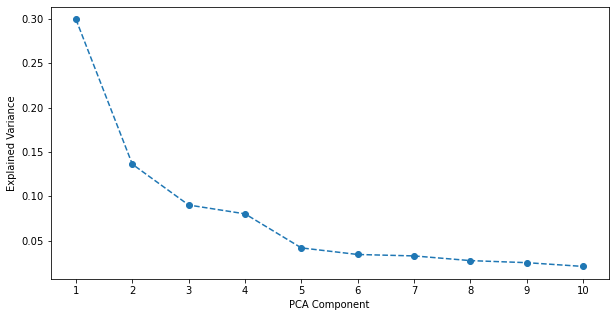

In [10]:
# Now we are running the data through PCA to help us visualize the data
pca = PCA(n_components=10)
reduced_data = pca.fit_transform(data)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

# Unlike MVP 2 we want to try to go ahead and see their explained variance
# and take accordingly
plt.figure(figsize=(10,5))
plt.plot(range(1,11),pca.explained_variance_ratio_, 'o--')
plt.xlabel("PCA Component")
plt.ylabel("Explained Variance")
plt.xticks(range(1,11));

Here we will proceed to take the first 4 components and continue on with our clustering algorithm.

Then just to make sure that we have good enough variance explained with our 4 components

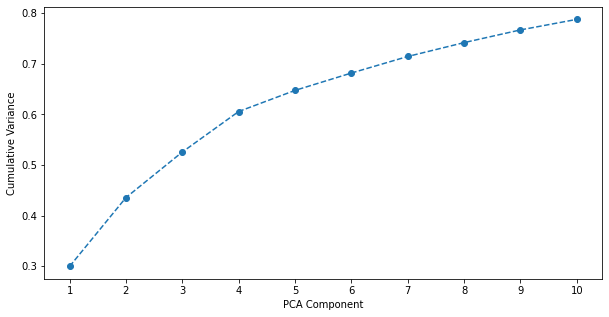

In [11]:
cum_var = []

cum_var.append(pca.explained_variance_ratio_[0])

for i in range(1, len(pca.explained_variance_ratio_)):
    cum_var.append(cum_var[i-1] + pca.explained_variance_ratio_[i])

plt.figure(figsize=(10,5))
plt.plot(range(1,11), cum_var, 'o--')
plt.xlabel("PCA Component")
plt.ylabel("Cumulative Variance")
plt.xticks(range(1,11));

In [12]:
cum_var[3]

0.6057614243937717

In [13]:
# So because we picked out the first 4 PCA we will be taking out those features
reduced_data = reduced_data[:, 0:4]
reduced_data.shape

(1650, 4)

In [14]:
kmeans = SpectralClustering(n_clusters=6)
kmeans.fit(reduced_data)

colormap = np.array(['Red', 'Blue', 'Green', 'Orange', 'Black', 'Magenta'])

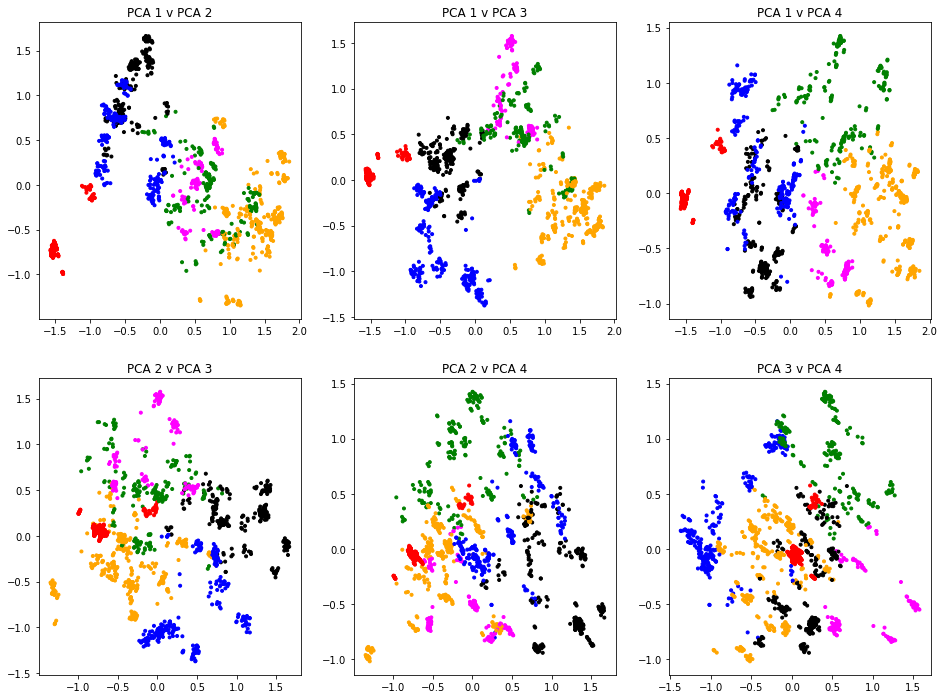

In [15]:
fig, axs = plt.subplots(2,3, figsize=(16,12))

axs[0,0].scatter(reduced_data[:, 0], reduced_data[:, 1], marker = '.', c = colormap[kmeans.labels_])
axs[0,0].set_title("PCA 1 v PCA 2");
axs[0,1].scatter(reduced_data[:, 0], reduced_data[:, 2], marker = '.', c = colormap[kmeans.labels_])
axs[0,1].set_title("PCA 1 v PCA 3");
axs[0,2].scatter(reduced_data[:, 0], reduced_data[:, 3], marker = '.', c = colormap[kmeans.labels_])
axs[0,2].set_title("PCA 1 v PCA 4");
axs[1,0].scatter(reduced_data[:, 1], reduced_data[:, 2], marker = '.', c = colormap[kmeans.labels_])
axs[1,0].set_title("PCA 2 v PCA 3");
axs[1,1].scatter(reduced_data[:, 1], reduced_data[:, 3], marker = '.', c = colormap[kmeans.labels_])
axs[1,1].set_title("PCA 2 v PCA 4");
axs[1,2].scatter(reduced_data[:, 2], reduced_data[:, 3], marker = '.', c = colormap[kmeans.labels_])
axs[1,2].set_title("PCA 3 v PCA 4");

plt.show()

Here as PCA 1 v PCA 3 looks the best to us, we will proceed with running everything in respect to this pairing

In [33]:
# exporting data to help with dashboard
data_pd["PCA-X"] = reduced_data[:, 0]
data_pd["PCA-Y"] = reduced_data[:, 2]
data_pd["CLUSTER"] = ag.labels_

data_pd.to_excel(path + "PCA-RCOMPL-KMEANS-RF.xlsx")

Following code will then compare all the different features to the pca plot so this is very intensive.

Skip to MVP 3 scores aquisition for our conclusions

In [ ]:
for feature in data_pd.columns.values:
    try:
        if data_pd[feature].dtypes != 'float64':
            imputed_D2 = data_pd[feature].fillna('missing')
            le = LabelEncoder()
            ft = le.fit_transform(imputed_D2.values)
            tickers = le.inverse_transform(np.unique(ft))
            print(feature)

            plt.figure(figsize=(10,8))
            plt.scatter(reduced_data[:, 0], reduced_data[:,2], s = 10, alpha = 0.5, c=ft, cmap=plt.cm.get_cmap('tab20', len(tickers)))
            cb = plt.colorbar(ticks=range(len(tickers)))
            cb.set_ticklabels(tickers)
            plt.clim(-0.5, len(tickers)-0.5)
            plt.title("PCA 1 v PCA 3");
            plt.show()


        else:
            print(feature)

            plt.figure(figsize=(10,8))
            plt.scatter(reduced_data[:, 0], reduced_data[:,2], s = 10, alpha = 0.5, c=ft, cmap=plt.cm.get_cmap('tab20', len(tickers)))
            plt.colorbar()
            plt.title("PCA 1 v PCA 3");
            plt.show()
    except:
        pass

## Stimulation stage

This code is the same as for the recompletion section so comments will be sparse

In [17]:
# Read in the data and get all the numerical data to run through the
# clustering
data_pd = pd.read_excel(path + "RF_STMSTG_RIG_SCALED_REPLACE.xlsx")

subset = data_pd.loc[:, data_pd.dtypes!=object]
subset

,Unnamed: 0,#WELL_NAME,CURRENT_STATUS,JOB_CATEGORY,JOB_START_DATE,JOB_END_DATE,JOB_STATUS,LIKE_KIND,PROJECT_TYPE,PHASE_START_DATE,...,Prod_Per_Stage,Errors_Per_Stage,UWI,UWI_SIDETRACK,REPORT_START_DATE_YEAR,STG_NUMBER,STG_CLEAN_VOLUME_PUMPED,STG_SLURRY_VOLUME_PUMPED,Rig_Duration (days),Stg_Duration (hrs)
0,0,438,1,0,104,86,2,3,1,137,...,2059.462963,2.851852,2019001300,0,2018,4,5263,5545,4,1
1,1,155,1,0,142,95,0,2,0,0,...,40445.060606,12.757576,2019000479,0,2018,3,8690,9146,36,2
2,2,248,2,0,130,110,1,2,0,174,...,9126.000000,8.000000,2019000810,0,2019,36,7008,7473,10,1
3,3,32,0,0,160,97,0,2,0,223,...,23750.150000,10.075000,2019000071,0,2019,20,8833,9297,284,2
4,4,37,2,0,133,70,0,2,0,185,...,26614.444444,9.622222,2019000076,0,2018,38,5201,5658,194,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17715,17715,222,1,0,79,99,0,3,1,124,...,1176.288462,2.961538,2019000730,0,2017,24,7672,7923,6,2
17716,17716,48,1,0,78,130,0,2,0,110,...,0.000000,6.560000,2019000087,0,2017,11,7904,8274,63,2
17717,17717,385,1,0,143,126,0,2,0,197,...,62843.941176,8.205882,2019000954,0,2018,34,6953,7409,189,1
17718,17718,369,2,0,5,10,0,2,0,8,...,41950.666667,9.333333,2019000932,0,2018,14,9732,10282,308,2


In [18]:
# scale data
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(subset), columns=subset.columns)

In [19]:
scaled_df

,Unnamed: 0,#WELL_NAME,CURRENT_STATUS,JOB_CATEGORY,JOB_START_DATE,JOB_END_DATE,JOB_STATUS,LIKE_KIND,PROJECT_TYPE,PHASE_START_DATE,...,Prod_Per_Stage,Errors_Per_Stage,UWI,UWI_SIDETRACK,REPORT_START_DATE_YEAR,STG_NUMBER,STG_CLEAN_VOLUME_PUMPED,STG_SLURRY_VOLUME_PUMPED,Rig_Duration (days),Stg_Duration (hrs)
0,0.000000,0.956332,0.5,0.0,0.587571,0.508876,1.0,0.6,1.0,0.559184,...,0.011136,0.005071,0.907498,0.0,0.5,0.027523,0.116956,0.121764,0.011299,0.001362
1,0.000056,0.338428,0.5,0.0,0.802260,0.562130,0.0,0.4,0.0,0.000000,...,0.218692,0.064033,0.332165,0.0,0.5,0.018349,0.193111,0.200839,0.101695,0.002725
2,0.000113,0.541485,1.0,0.0,0.734463,0.650888,0.5,0.4,0.0,0.710204,...,0.049345,0.035714,0.564121,0.0,1.0,0.321101,0.155733,0.164101,0.028249,0.001362
3,0.000169,0.069869,0.0,0.0,0.903955,0.573964,0.0,0.4,0.0,0.910204,...,0.128420,0.048065,0.046251,0.0,1.0,0.174312,0.196289,0.204155,0.802260,0.002725
4,0.000226,0.080786,1.0,0.0,0.751412,0.414201,0.0,0.4,0.0,0.755102,...,0.143908,0.045370,0.049755,0.0,0.5,0.339450,0.115578,0.124245,0.548023,0.001362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17715,0.999774,0.484716,0.5,0.0,0.446328,0.585799,0.0,0.6,1.0,0.506122,...,0.006360,0.005723,0.508059,0.0,0.0,0.211009,0.170489,0.173983,0.016949,0.002725
17716,0.999831,0.104803,0.5,0.0,0.440678,0.769231,0.0,0.4,0.0,0.448980,...,0.000000,0.027143,0.057463,0.0,0.0,0.091743,0.175644,0.181690,0.177966,0.002725
17717,0.999887,0.840611,0.5,0.0,0.807910,0.745562,0.0,0.4,0.0,0.804082,...,0.339805,0.036940,0.665032,0.0,0.5,0.302752,0.154511,0.162696,0.533898,0.001362
17718,0.999944,0.805677,1.0,0.0,0.028249,0.059172,0.0,0.4,0.0,0.032653,...,0.226833,0.043651,0.649615,0.0,0.5,0.119266,0.216267,0.225784,0.870056,0.002725


In [20]:
data = scaled_df.to_numpy()
data

array([[0.00000000e+00, 9.56331878e-01, 5.00000000e-01, ...,
        1.21763763e-01, 1.12994350e-02, 1.36239782e-03],
       [5.64365935e-05, 3.38427948e-01, 5.00000000e-01, ...,
        2.00838841e-01, 1.01694915e-01, 2.72479564e-03],
       [1.12873187e-04, 5.41484716e-01, 1.00000000e+00, ...,
        1.64101100e-01, 2.82485876e-02, 1.36239782e-03],
       ...,
       [9.99887127e-01, 8.40611354e-01, 5.00000000e-01, ...,
        1.62695711e-01, 5.33898305e-01, 1.36239782e-03],
       [9.99943563e-01, 8.05676856e-01, 1.00000000e+00, ...,
        2.25784492e-01, 8.70056497e-01, 2.72479564e-03],
       [1.00000000e+00, 4.17030568e-01, 5.00000000e-01, ...,
        3.19967500e-01, 1.07344633e-01, 4.08719346e-03]])

[0.29652218 0.10859063 0.10516046 0.07931852 0.04965187 0.04467651
 0.03697829 0.02984    0.02883095 0.02420032]
0.8037697359860775


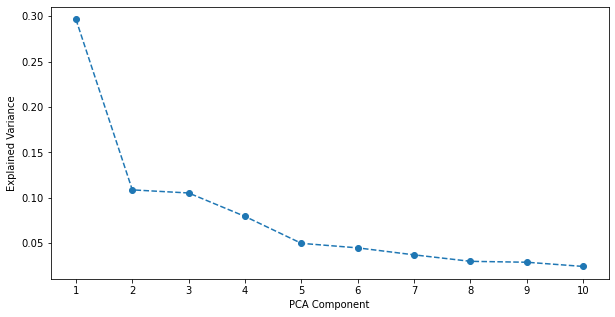

In [21]:
# Run the PCA and get the number of PCA components to grab
pca = PCA(n_components=10)
reduced_data = pca.fit_transform(data)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))


plt.figure(figsize=(10,5))
plt.plot(range(1,11),pca.explained_variance_ratio_, 'o--')
plt.xlabel("PCA Component")
plt.ylabel("Explained Variance")
plt.xticks(range(1,11));

Here we will also be grabbing 4 PCA components, so we will proceed accordingly

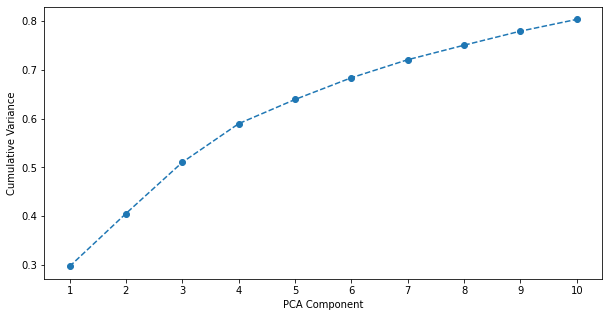

In [22]:
cum_var = []

cum_var.append(pca.explained_variance_ratio_[0])

for i in range(1, len(pca.explained_variance_ratio_)):
    cum_var.append(cum_var[i-1] + pca.explained_variance_ratio_[i])

plt.figure(figsize=(10,5))
plt.plot(range(1,11), cum_var, 'o--')
plt.xlabel("PCA Component")
plt.ylabel("Cumulative Variance")
plt.xticks(range(1,11));

In [23]:
cum_var[3]

0.5895917889557765

In [24]:
# So now reduce working data to those 4 components
reduced_data = reduced_data[:, 0:4]
reduced_data.shape

(17720, 4)

In [25]:
kmeans = SpectralClustering(n_clusters=6)
kmeans.fit(reduced_data)

colormap = np.array(['Red', 'Blue', 'Green', 'Orange', 'Black', 'Magenta'])

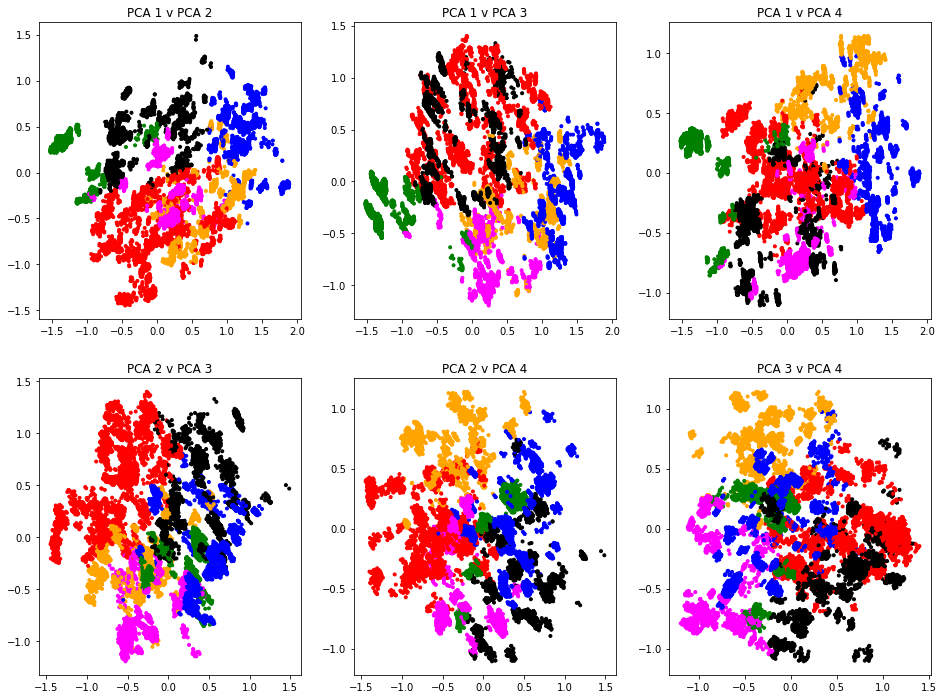

In [26]:
#Plot results
fig, axs = plt.subplots(2,3, figsize=(16,12))

axs[0,0].scatter(reduced_data[:, 0], reduced_data[:, 1], marker = '.', c = colormap[kmeans.labels_])
axs[0,0].set_title("PCA 1 v PCA 2");
axs[0,1].scatter(reduced_data[:, 0], reduced_data[:, 2], marker = '.', c = colormap[kmeans.labels_])
axs[0,1].set_title("PCA 1 v PCA 3");
axs[0,2].scatter(reduced_data[:, 0], reduced_data[:, 3], marker = '.', c = colormap[kmeans.labels_])
axs[0,2].set_title("PCA 1 v PCA 4");
axs[1,0].scatter(reduced_data[:, 1], reduced_data[:, 2], marker = '.', c = colormap[kmeans.labels_])
axs[1,0].set_title("PCA 2 v PCA 3");
axs[1,1].scatter(reduced_data[:, 1], reduced_data[:, 3], marker = '.', c = colormap[kmeans.labels_])
axs[1,1].set_title("PCA 2 v PCA 4");
axs[1,2].scatter(reduced_data[:, 2], reduced_data[:, 3], marker = '.', c = colormap[kmeans.labels_])
axs[1,2].set_title("PCA 3 v PCA 4");

plt.show()

Again, PCA 1 v PCA 3 is the best looking one so we will continue with it.

In [45]:
# Exporting for Dashboard use
data_pd["PCA-X"] = reduced_data[:, 0]
data_pd["PCA-Y"] = reduced_data[:, 2]
data_pd["CLUSTER"] = ag.labels_

data_pd.to_excel(path + "PCA-STMSTG-Agglomerative-RF.xlsx")

Following code will then compare all the different features to the pca plot so this is very intensive.

Skip to MVP 3 scores aquisition for our conclusions

In [ ]:
for feature in data_pd.columns.values:
    try:
        if data_pd[feature].dtypes != 'float64':
            imputed_D2 = data_pd[feature].fillna('missing')
            le = LabelEncoder()
            ft = le.fit_transform(imputed_D2.values)
            tickers = le.inverse_transform(np.unique(ft))
            print(feature)

            plt.figure(figsize=(10,8))
            plt.scatter(reduced_data[:, 0], reduced_data[:,2], s = 10, alpha = 0.5, c=ft, cmap=plt.cm.get_cmap('tab20', len(tickers)))
            cb = plt.colorbar(ticks=range(len(tickers)))
            cb.set_ticklabels(tickers)
            plt.clim(-0.5, len(tickers)-0.5)
            plt.title("PCA 1 v PCA 3");
            plt.show()


        else:
            print(feature)

            plt.figure(figsize=(10,8))
            plt.scatter(reduced_data[:, 0], reduced_data[:,2], s = 10, alpha = 0.5, c=ft, cmap=plt.cm.get_cmap('tab20', len(tickers)))
            plt.colorbar()
            plt.title("PCA 1 v PCA 3");
            plt.show()
    except:
        pass